<a href="https://colab.research.google.com/github/SergeyBryukhanov/SergeyBryukhanov/blob/main/Handwritten_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Модель по распознаванию рукописных цифр, выполнена в рамках изучения неронных сетей

Используя датасет по рукописным буквам английского языка, обучите модель, оцените ее предсказательные способности. Используйте только полносвязанные слои. Поэкспериментируйте с числом слоев и числом нейронов в слое, добейтесь максимальной точности. Используйте куски кода и рекомендации из практической части урока. Нарисуйте графики точности и потерь для обучающей и тестовой выборки, сделайте по ним выводы.

Оценка за задание:
* 1 балл - задача решена с помощью куратора, точность на проверочной выборке ниже 85%
* 2 балла - задача решена с подсказками куратора, точность на проверочной выборке выше 85%
* 3 балла - задача решена самостоятельно, точность на проверочной выборке выше 85%
* 4 балла - задача решена самостоятельно, точность на проверочной выборке выше 93%
* 5 баллов - задача решена самостоятельно, точность на проверочной выборке выше 97%

In [ ]:
!wget 'https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv'

--2024-11-13 19:48:17--  https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 698907044 (667M) [text/csv]
Saving to: ‘A_Z_Handwritten_Data.csv’

A_Z_Handwritten_Dat 100%[===================>] 666.53M  25.8MB/s    in 27s     

2024-11-13 19:48:46 (24.4 MB/s) - ‘A_Z_Handwritten_Data.csv’ saved [698907044/698907044]



In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras.utils import to_categorical

In [ ]:
dataset = np.loadtxt('A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',
             10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',
             18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

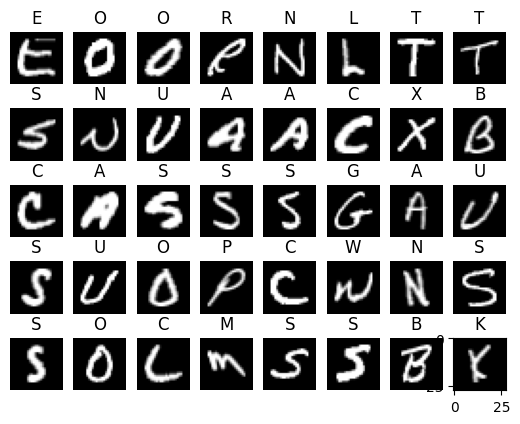

In [ ]:
for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')

In [ ]:
model = models.Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(196, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(26, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train = x_train.reshape((297960, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((74491, 28 * 28))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train, 26) # Кодируем обучающие метки на 10 классов
y_test = to_categorical(y_test, 26)   # Кодируем тестовые метки на 10 классов

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test , y_test), epochs=5, batch_size=128)

Epoch 1/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 50s 21ms/step - accuracy: 0.8869 - loss: 0.3976 - val_accuracy: 0.9710 - val_loss: 0.1015
Epoch 2/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.9774 - loss: 0.0803 - val_accuracy: 0.9762 - val_loss: 0.0851
Epoch 3/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 82s 21ms/step - accuracy: 0.9842 - loss: 0.0534 - val_accuracy: 0.9819 - val_loss: 0.0661
Epoch 4/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 79s 20ms/step - accuracy: 0.9884 - loss: 0.0383 - val_accuracy: 0.9841 - val_loss: 0.0625
Epoch 5/5
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 53s 23ms/step - accuracy: 0.9913 - loss: 0.0296 - val_accuracy: 0.9859 - val_loss: 0.0595


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9864 - loss: 0.0555
Точность на тестовом образце: 0.9858909249305725
Потери на тестовом образце: 0.05948468670248985


In [ ]:
n = 23
x = x_test[n]
x = np.expand_dims(x, axis=0)

# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 10 чисел
print(f'Вектор результата на 26 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана буква: {word_dict[pred]}')
print(f'Правильное значение: {word_dict[np.argmax(y_test[n])]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Вектор результата на 26 выходных нейронах: [[9.13928509e-29 1.89267289e-13 1.32855815e-18 2.81850343e-21
  1.37501538e-10 9.76718489e-18 2.89139801e-09 1.83675732e-30
  1.89432745e-20 2.38619812e-15 1.54476961e-24 1.53928952e-21
  5.01468337e-36 5.56956638e-27 1.02971053e-15 4.99915140e-30
  2.14170990e-22 2.59367658e-28 1.00000000e+00 1.60385254e-22
  4.54546969e-27 6.07031548e-28 3.41761112e-32 1.31776335e-23
  6.38298056e-20 1.52984412e-25]]
Распознана буква: S
Правильное значение: S


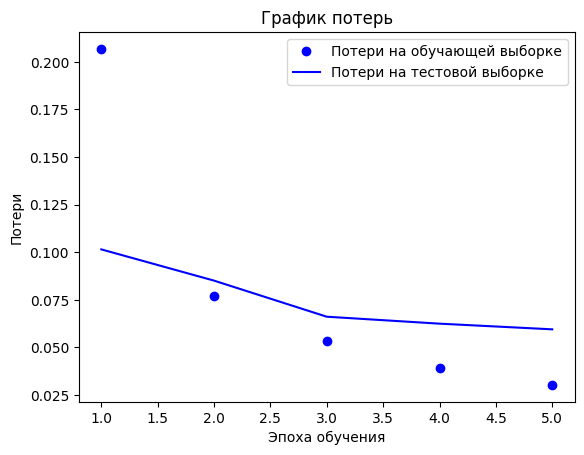

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

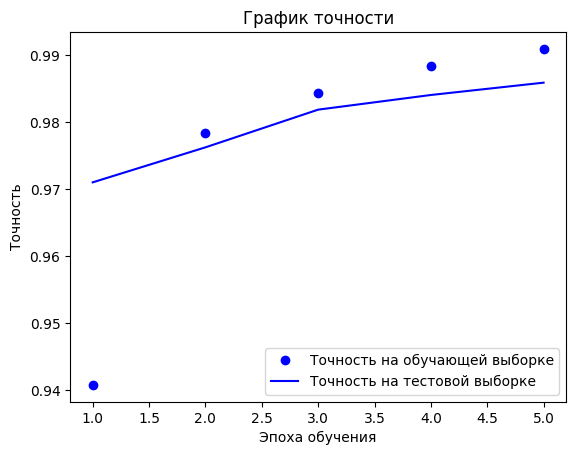

In [ ]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [ ]:
# Вывод: по графикам видно что потери снижаются и точность растет с каждой эпохой: это наиболее заметно до 3 эпохи, после изменения
# менее интенсивные. Наблюдаются признаки переобучения

# Точность на тестовом образце: 0.9858909249305725
# Потери на тестовом образце: 0.05948468670248985